In [1]:
# 이 종양이 악성이냐 양성이냐?
#           malignant vs benign

In [3]:
# 타겟 : 악성(1), 양성(0)
# 이미지 데이터 X
# 표데이터

In [ ]:
import numpy as np

# w1*x1 + w2*x2 + w3*x3 + w4*x4 + x5*x5 + ... + w20*x20 + b

In [4]:
# sigmoid 시그모이드

In [15]:
# e = 2.718182...

In [18]:
from math import e
import numpy as np

In [34]:
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + (e ** -x))

In [35]:
import matplotlib.pyplot as plt

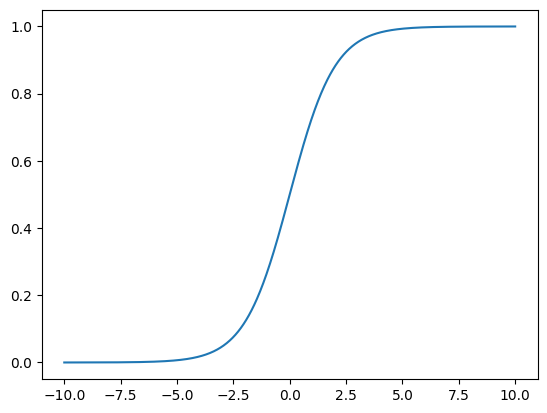

In [36]:
plt.plot(x, y)

In [37]:
# 분류를 위한 loss function : Cross Entropy
# -(1 - y)*ln(1-y_hat) * y*ln(y_hat)

In [38]:
# 선형회귀일 때에는 activation 없이, 손실함수는 MSE.
# 분류문제일 때에는 activation=sigmoid, 손실함수는 cross-entr.

In [39]:
# 레이어 하나, 유닛 하나짜리 logistic regression 모델
# (0 또는 1의 레이블을 갖는 어떤 데이터셋을 가지고)

In [41]:
from keras import Sequential
from keras.layers import Dense, Activation

In [42]:
X = np.array([-2, -1.5, -1, 1.25, 1.62, 2])
y = np.array([0, 0, 0, 1, 1, 1])

In [44]:
model = Sequential()
model.add(Dense(input_dim=1, units=1))
model.add(Activation("sigmoid"))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["binary_accuracy"])

In [47]:
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 310ms/step - loss: 1.0381 - binary_accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0278 - binary_accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0175 - binary_accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0074 - binary_accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 0.9975 - binary_accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 0.9876 - binary_accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 0.9778 - binary_accuracy: 0.0000e+00
Epoch 8/300
1/1 [==============================] - 0s 6ms/step - loss: 0.9682 - binary_accuracy: 0.0000e+00
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 0.9587 - binary_accuracy: 0.0000e+00
Epoch 10/300
1/1 [========

In [48]:
model.evaluate(X, y)

1/1 [==============================] - 0s 158ms/step - loss: 0.1794 - binary_accuracy: 1.0000


[0.17942823469638824, 1.0]

In [50]:
model.predict([0])

1/1 [==============================] - 0s 32ms/step


array([[0.4959021]], dtype=float32)

In [53]:
model.get_weights()

[array([[1.0831908]], dtype=float32), array([-0.016392], dtype=float32)]

1/1 [==============================] - 0s 28ms/step


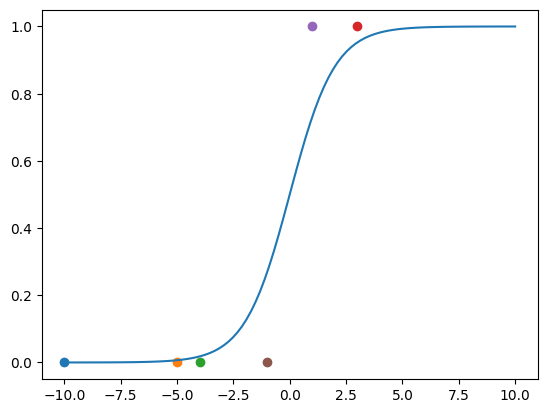

In [79]:
def sigmoid(x):
    return 1 / (1 + (e ** -x))

def threshold(x):
    if x < 0.5:
        return 0
    else:
        return 1

w = model.get_weights()[0]
b = model.get_weights()[1]

x = np.linspace(-10, 10, 100)
y = (np.linspace(-10, 10, 100) *  w + b).reshape(100)

plt.plot(x, sigmoid(x))
plt.scatter(-10, threshold(model.predict([-10])))
plt.scatter(-5, threshold(model.predict([-5])))
plt.scatter(-4, threshold(model.predict([-4])))
plt.scatter(3, threshold(model.predict([3])))
plt.scatter(1, threshold(model.predict([1])))
plt.scatter(-1, threshold(model.predict([-1])))
plt.show()